In [8]:
from koala import lattice
from koala import plotting as pl
from koala. pointsets import generate_bluenoise
from koala.voronization import generate_lattice
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
points = generate_bluenoise(20,10,10)
lattice = generate_lattice(points)




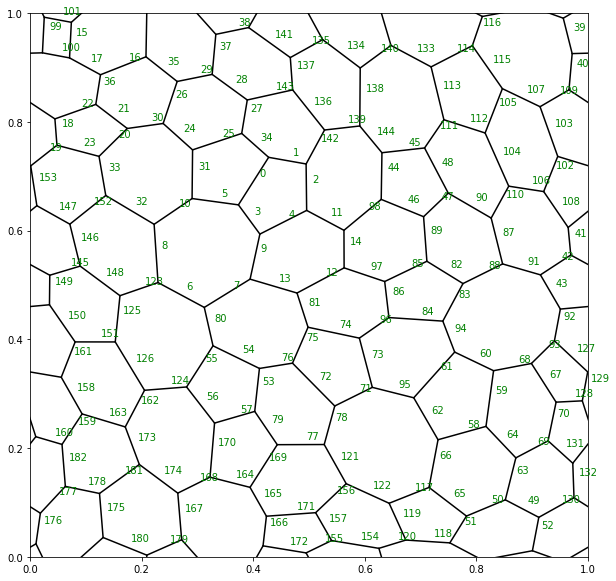

In [57]:

fig, ax = plt.subplots(figsize = (10,10) )
pl.plot_edges(lattice,)
pl.plot_edge_indices(lattice)



In [46]:
# loop diagram


size = 2
output = '\\begin{tikzpicture} \n\n'

loop = np.array([7,3,2,98,85,84,73,72,76])
line_centers = []
for edge in lattice.edges.indices[loop]:
    pos1 = lattice.vertices.positions[edge[0]]
    pos2 = lattice.vertices.positions[edge[1]]
    line_centers.append((pos1+pos2)/2)

windowsize = np.array([0.7, 0.5])
scale = 2*size / windowsize[0]

def check_in_window(point):
    rangex = np.array([0.5 - windowsize[0]/2 , 0.5 + windowsize[0]/2])
    rangey = np.array([0.5 - windowsize[1]/2 , 0.5 + windowsize[1]/2])
    truth = (point[0] > rangex[0]) & (point[0] < rangex[1]) & (point[1] > rangey[0]) & (point[1] < rangey[1])
    return truth



for n, x in enumerate(zip(lattice.edges.indices, lattice.edges.crossing)):
    edge, cross = x
    pos1 = lattice.vertices.positions[edge[0]]
    pos2 = lattice.vertices.positions[edge[1]]

    if n in loop:
        linetype = 'line width=0.6mm,red!60'    
    else:
        linetype = 'line width=0.4mm,'

    if check_in_window(pos1) or check_in_window(pos2):

        output = output + f'\\draw [{linetype}] ({pos1[0]*scale} , {pos1[1]*scale}) --  ({pos2[0]*scale} , {pos2[1]*scale}); \n'

output = output + '\draw [blue,line width=0.4mm] plot [smooth cycle] coordinates {'
for pos in line_centers:
    output = output + f' {pos[0]*scale, pos[1]*scale} '
output = output + '};\n'
output = output + '\n\\end{tikzpicture}'
with open('diagram', 'w') as f:
    f.write(output)

In [70]:
# tree diagram
from koala import graph_utils as gu

size = 2
output = '\\begin{tikzpicture} \n\n'

windowsize = np.array([0.7, 0.5])
scale = 2*size / windowsize[0]

def check_in_window(point):
    rangex = np.array([0.5 - windowsize[0]/2 , 0.5 + windowsize[0]/2])
    rangey = np.array([0.5 - windowsize[1]/2 , 0.5 + windowsize[1]/2])
    truth = (point[0] > rangex[0]) & (point[0] < rangex[1]) & (point[1] > rangey[0]) & (point[1] < rangey[1])
    return truth

tree = gu.plaquette_spanning_tree(lattice)
tree = np.append(tree,[14,6,10, 123, 89])

centers = np.array([p.center for p in lattice.plaquettes ])


print(tree)
for n, x in enumerate(zip(lattice.edges.indices, lattice.edges.crossing)):
    edge, cross = x
    pos1 = lattice.vertices.positions[edge[0]]
    pos2 = lattice.vertices.positions[edge[1]]

    linetype = 'line width=0.6mm, red!60' if n in tree else 'line width=0.4mm,'


    if check_in_window(pos1) or check_in_window(pos2):
        output = output + f'\\draw [{linetype}] ({pos1[0]*scale} , {pos1[1]*scale}) --  ({pos2[0]*scale} , {pos2[1]*scale}); \n'
        
        if n in tree:
            adjacent_plaquettes = lattice.edges.adjacent_plaquettes[n]
            plaq_pos1 = centers[adjacent_plaquettes[0]]
            plaq_pos2 = centers[adjacent_plaquettes[1]]
            output = output + f'\\draw [line width=0.4mm, blue!60] ({plaq_pos1[0]*scale} , {plaq_pos1[1]*scale}) --  ({plaq_pos2[0]*scale} , {plaq_pos2[1]*scale}); \n'


output = output + '\n\\end{tikzpicture}'


with open('diagram', 'w') as f:
    f.write(output)

[  0  25   4  28 141 203 134 136  12  74  72  79 169 171  57 157 119  65
  50  63 130 131  70  67  59  61  84  85  82  46  48 104 103 189 108  44
 166  42 170  54  26  21  23  22 100  15 147  35 146 148 150 200 158 159
 182 177  20 181 138 113 115  39 114 126  93 122   5  14   6  10 123]
